<a href="https://colab.research.google.com/github/kani215/ML_study/blob/main/ml4_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



4.1 결정 트리 학습과 시각화




[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

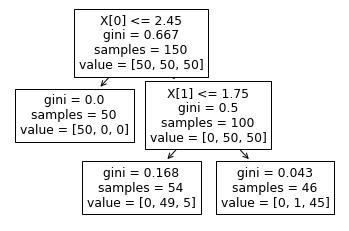

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
x = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

# 시각화 출력
tree.plot_tree(tree_clf)



4.1.1 클래스 확률 추정
- 훈련된 결정 트리에 한 샘플 대이터가 특정 클래스 k에 속할 확률을 추정할 수도 있다.
- 이 샘플은 먼저 리프 노드를 찾기 위해 트리를 탐색하고 
- 그 노드에 있는 클래스 k의 훈련 샘플 비율 반환
예를 들면 길이가 5cm이고 너비가 1.5cm인 샘플은 

iris -setosa 0/54
iris-versicolor 49/54
virginica 9/54

이기에 클래스 1을 출력할것

In [ ]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5,1.5]])

array([1])



4.2 연속 데이터 처리



In [ ]:
import math
x = [0.244, 0.294, 0.351, 0.381, 0.420, 0.459, 0.518, 0.574, 0.600, 0.621, 0.636, 0.648, 0.661, 0.681, 0.708, 0.746]
y = [0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,1]
def ent(p):
  if p == 0 or p == 1:
      return 0
  else:
    return -1 * (p*math.log2(p) + (1-p)*math.log2(1-p))
listq = []

for i in range(1,17):
  ent_parent = ent(8/17)
  listq.append((i/17*ent(sum(y[:i])/i)+(1-(i/17))*ent(sum(y[i:])/(17-i))))
  print(y[:i],y[i:],listq)
print(listq)
print("정보 이득이 0.262라는 것을 계산할 수 있고, 이에 상응하는 분할점은 0.381이다")

[0] [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353]
[0, 0] [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353, 0.8795220282190911]
[0, 0, 0] [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353, 0.8795220282190911, 0.8113643473223248]
[0, 0, 0, 0] [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353, 0.8795220282190911, 0.8113643473223248, 0.7350632859645521]
[0, 0, 0, 0, 1] [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353, 0.8795220282190911, 0.8113643473223248, 0.7350632859645521, 0.9040038561323909]
[0, 0, 0, 0, 1, 1] [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353, 0.8795220282190911, 0.8113643473223248, 0.7350632859645521, 0.9040038561323909, 0.9673004312102034]
[0, 0, 0, 0, 1, 1, 1] [1, 0, 1, 1, 0, 0, 0, 1, 0, 1] [0.9411764705882353, 0.8795220282190911, 0.8113643473223248, 0.7350632859645521, 0.9040038561323909, 0.9673004312102034, 0.9939174677788094]
[0, 0, 0, 0, 1, 1, 1, 1] [0, 1, 1, 0, 0, 0, 1, 0, 1] [0.941176

In [ ]:
ent_parent-0.7350632859645521

0.2624392604045632